# Diagnosing Heart Disease


### Using ML Tools and Techniques

### Context


This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the 

Cleveland database is the only one that has been used by ML researchers to

this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) 

to 4.



### Introduction

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use Random Forest Classifier (classification) algorithm.




###### This dataset gives a number of variables along with a target condition of having or not having heart disease. Below, the data 

###### is first used in a simple random forest model, and then the model is investigated using ML tools and 

###### techniques.

###### First, Load important Libraries=>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn import metrics #for model evalution
from sklearn.feature_selection import RFE,RFECV   #for feature selection
from sklearn.model_selection import train_test_split #for data splitting
pd.options.mode.chained_assignment = None  #hide any pandas warnings

#  Data==>

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.head()   # upper five observation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()  # lower five oservation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.drop(index=[48,281],axis=0,inplace=True)  # blank value, so thats why i removed

###### However, the meaning of some of the column headers are not obvious. Here's what they mean

* age: The person's age in years

* sex: The person's sex (1 = male, 0 = female)

* cp: The chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: 
  asymptomatic)

* trestbps: resting blood pressure (on admission to the hospital)

* chol: cholesterol

* fbs: fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable)

* thalach: maximum heart rate achieved

* exang: Exercise induced angina (1 = yes; 0 = no)

* oldpeak: ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

* ca: The number of major vessels (0-3)

* thal: thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

* target: Heart disease (0 = no, 1 = yes)

###### Let's change the column names to be a bit clearer->

In [6]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'slope', 'no_major_vessels', 'thalassemia', 'target']

In [7]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,no_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.chest_pain_type.value_counts()

0    142
2     86
1     50
3     23
Name: chest_pain_type, dtype: int64

## I'm also going to change the values of the categorical variables, to improve the interpretation

In [9]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['slope'][data['slope'] == 0] = 'upsloping'
data['slope'][data['slope'] == 1] = 'flat'
data['slope'][data['slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [10]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,no_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


# Data Exploration (EDA)==>

In [11]:
data.info()       # zero null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
age                        301 non-null int64
sex                        301 non-null object
chest_pain_type            301 non-null object
resting_blood_pressure     301 non-null int64
cholesterol                301 non-null int64
fasting_blood_sugar        301 non-null object
rest_ecg                   301 non-null object
max_heart_rate_achieved    301 non-null int64
exercise_induced_angina    301 non-null object
st_depression              301 non-null float64
slope                      301 non-null object
no_major_vessels           301 non-null int64
thalassemia                301 non-null object
target                     301 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 35.3+ KB


In [12]:
data.age.skew()       # near to normal distribution

-0.2059325834770488

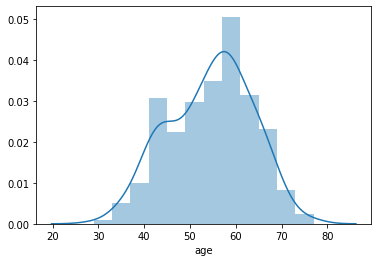

In [13]:
sns.distplot(data.age)

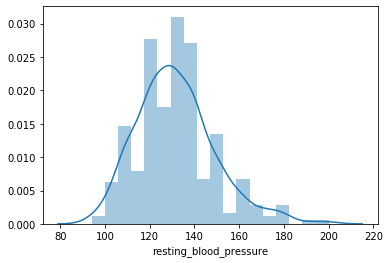

In [14]:
sns.distplot(data.resting_blood_pressure)

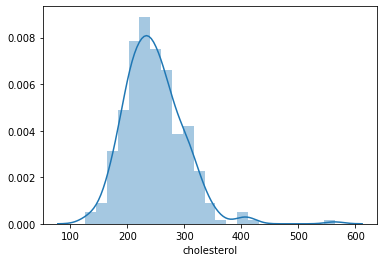

In [15]:
sns.distplot(data.cholesterol)     #positive skewed and some outlier also

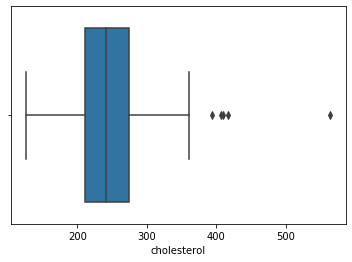

In [16]:
sns.boxplot(data.cholesterol)    # upper outlier

##### all are natural outlier because cholestral level can be above 500 

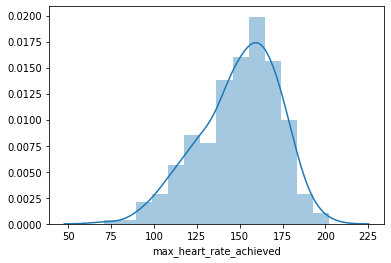

In [17]:
sns.distplot(data.max_heart_rate_achieved)   # moderate skew to left side

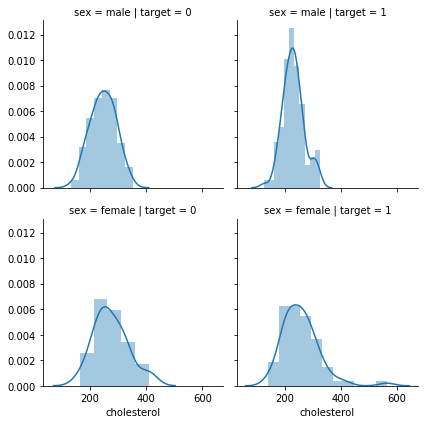

In [20]:
g=sns.FacetGrid(data,row="sex",col="target")   #female cholestral level is very high with target 1 as compared to other
g.map(sns.distplot,"cholesterol")

In [19]:
data.target.value_counts()

1    164
0    137
Name: target, dtype: int64

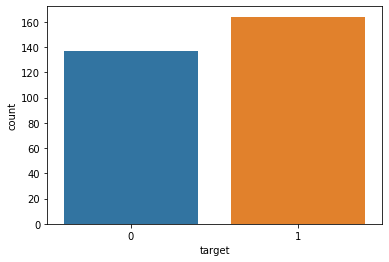

In [21]:
sns.countplot(x="target", data=data )
plt.show()

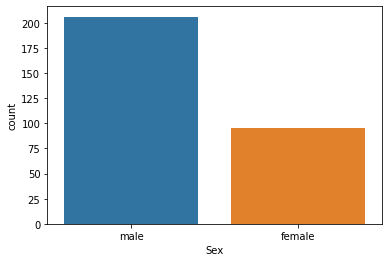

In [22]:
sns.countplot(x='sex', data=data)
plt.xlabel('Sex')
plt.show()

### Heart Disease Frequency Ages Wise==>

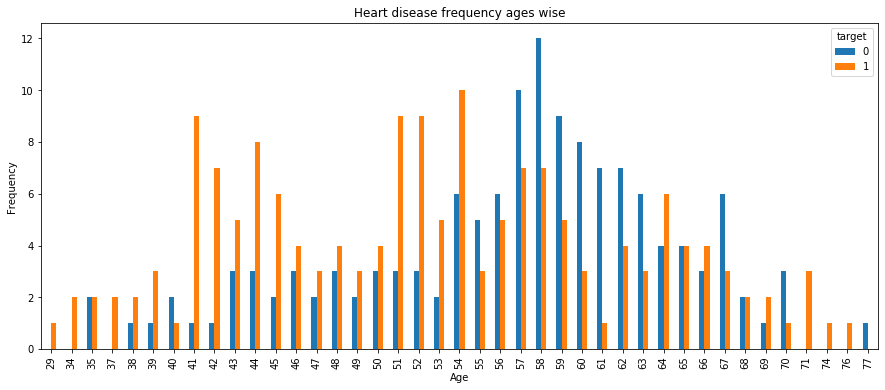

In [23]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart disease frequency ages wise')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Heart Disease Frequency Sex Wise==>

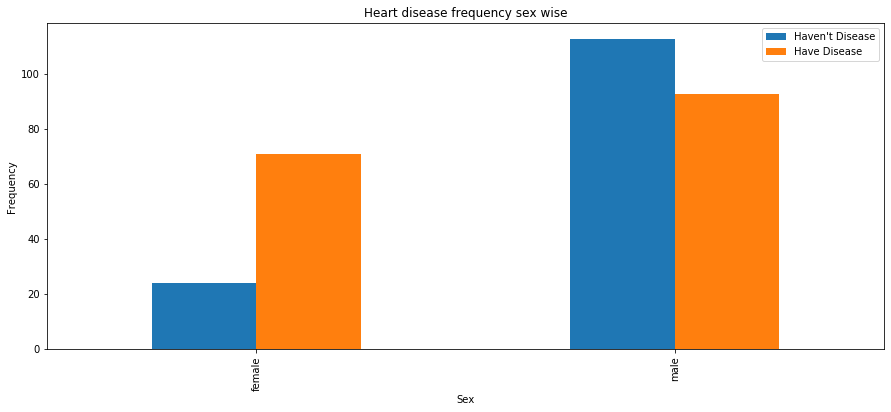

In [24]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart disease frequency sex wise')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# Heart disease frequency acc. to fasting_blood_sugar==>

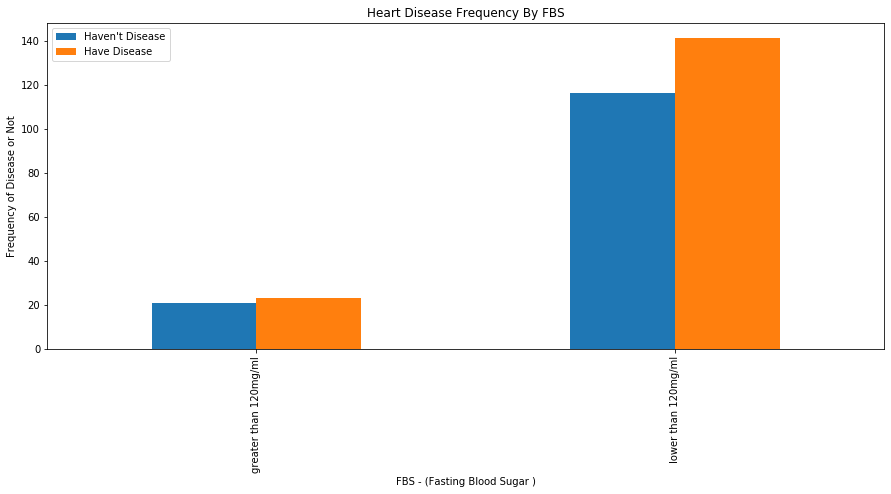

In [25]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency By FBS')
plt.xlabel('FBS - (Fasting Blood Sugar )')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Heart disease frequency acc. to chest pain type

In [26]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,slope,no_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


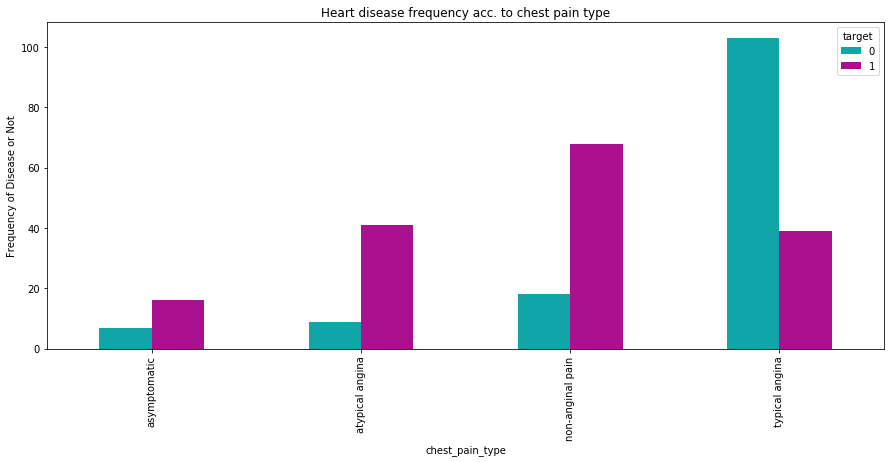

In [27]:
pd.crosstab(data.chest_pain_type,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart disease frequency acc. to chest pain type')
plt.xlabel('chest_pain_type')
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Creating Dummy Variables==>

In [28]:
data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
slope                       object
no_major_vessels             int64
thalassemia                 object
target                       int64
dtype: object


For the categorical varibles, we need to create dummy variables. I'm also going to drop the first category of each. Ex- rather 

than having 'male' and 'female', we'll have 'male' with values of 0 or 1 (1 being male, and 0 therefore being female).

In [29]:
data=pd.get_dummies(data,drop_first=True)

In [30]:
data.head()   # now,let's see

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,no_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,slope_flat,slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,1,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,0,0,0,0


In [31]:
data.shape

(301, 19)

###### Looking good. Now i fits a Random forest model to the data

# Model==>

###### create two variable (x,y), x stores all independent features and  (y) store dependent feature

In [32]:
x=data.drop("target",axis=1).values


In [33]:
y=data.target.values


#### We will split our data. 75% of our data will be train data and 25% of it will be test data.

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) #split the data

In [35]:
x_train.shape

(225, 18)

In [36]:
x_test.shape

(76, 18)

In [37]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)                     #fits the data into model

C:\Users\p\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

###### We can't plot the consequent decision tree,because max_depth of random forest may bi high if you want to show the 
###### random forest plot you can edit the max_depth parameter value and then use export_graphviz package for visualize tree

In [38]:
y_predict=model.predict(x_test)
y_predict                       #predicted value

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [39]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predict)
confusion_matrix

array([[30,  8],
       [ 4, 34]], dtype=int64)

In [40]:
classification_report=metrics.classification_report(y_test,y_predict)
print(classification_report)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.81      0.89      0.85        38

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [41]:
accuracy=metrics.accuracy_score(y_test,y_predict)    # accuracy
accuracy

0.8421052631578947

#### Let's also check with a Receiver Operator Curve (ROC)

In [42]:
y_pred_prob=model.predict_proba(x_test)[:,1]

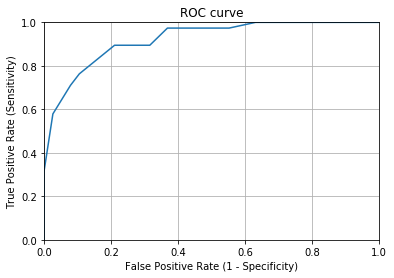

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [44]:
metrics.auc(fpr,tpr)    #auc Area Under the Curve

0.9213988919667591

it's working well

In [45]:
Rfecv=RFECV(estimator=model)

In [46]:
Rfecv=Rfecv.fit(x_train,y_train)

C:\Users\p\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [47]:
X_train_df=data.drop("target",axis=1)    # because columns attribute not in array so thats why array convert into dataframe

In [48]:
list(zip(X_train_df.columns,Rfecv.support_,Rfecv.ranking_))

[('age', True, 1),
 ('resting_blood_pressure', True, 1),
 ('cholesterol', True, 1),
 ('max_heart_rate_achieved', True, 1),
 ('st_depression', True, 1),
 ('no_major_vessels', True, 1),
 ('sex_male', True, 1),
 ('chest_pain_type_atypical angina', True, 1),
 ('chest_pain_type_non-anginal pain', True, 1),
 ('chest_pain_type_typical angina', True, 1),
 ('fasting_blood_sugar_lower than 120mg/ml', False, 2),
 ('rest_ecg_left ventricular hypertrophy', False, 3),
 ('rest_ecg_normal', True, 1),
 ('exercise_induced_angina_yes', True, 1),
 ('slope_flat', True, 1),
 ('slope_upsloping', True, 1),
 ('thalassemia_normal', False, 4),
 ('thalassemia_reversable defect', True, 1)]

In [49]:
Rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True])

In [50]:
X_train_df.columns[Rfecv.support_]

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'no_major_vessels',
       'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_normal', 'exercise_induced_angina_yes', 'slope_flat',
       'slope_upsloping', 'thalassemia_reversable defect'],
      dtype='object')

### all are significant features

'age', 'resting_blood_pressure', 'cholesterol',

'max_heart_rate_achieved', 'st_depression', 'no_major_vessels',

'sex_male', 'chest_pain_type_atypical angina',

'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',

'rest_ecg_normal', 'exercise_induced_angina_yes', 'slope_flat',

'slope_upsloping', 'thalassemia_reversable defect']

## Again fit the model with these significant features==>

In [51]:
X_train=x_train
X_test=x_test

In [52]:
X_train

array([[ 60., 150., 240., ...,   0.,   0.,   0.],
       [ 52., 112., 230., ...,   0.,   0.,   0.],
       [ 54., 150., 232., ...,   0.,   0.,   1.],
       ...,
       [ 46., 105., 204., ...,   0.,   0.,   0.],
       [ 47., 138., 257., ...,   0.,   0.,   0.],
       [ 58., 132., 224., ...,   0.,   0.,   1.]])

In [53]:
X_train=np.delete(x_train,obj=[10,11,16],axis=1)   # remove 10,11,16 columns because these are not important
X_test=np.delete(x_test,obj=[10,11,16],axis=1)  

In [54]:
model_new=RandomForestClassifier(random_state=0)


In [55]:
model_new.fit(X_train,y_train)      # fit model after removes cloumns with the help of RFECV

C:\Users\p\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
Y_predict=model_new.predict(X_test)
Y_predict

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [57]:
classification_report_new=metrics.classification_report(y_test,Y_predict)
print(classification_report_new)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.81      0.89      0.85        38

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [58]:
print(classification_report)                          #nothing much has changed  same like older

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.81      0.89      0.85        38

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



## Random Forest Algorithm Accuracy Score : 0.84

## Random Forest Algorithm AUC Score : 0.92


#### Our model work fine


`